In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, trange # progress bars

import torch
import torch.nn as nn
import torch.nn.functional as F

from TTT_env import TTT
from neural_nets import ValueNet, PolicyNet, Training
from mcts import MCTS, Node
from self_play import Self_Play
import pickle

In [2]:
parameter_path = "./dnn_checkpoints2/"
iterations = 12 # number of `play -> train` loops
games = 1000 # games per self-play session
depth = 15 # search depth for monte-carlo tree search
temperature = 1 # temperature determining action-selection based on MCTS visit count
lr_p = 0.01 # learning rate for policy net
lr_v = 0.01 # learning rate for value net
batchsize_p = 64
batchsize_v = 64
epochs_p = 12
epochs_v = 12
b_scores = []
load_previous_games = True # In case you only want to retrain the networks
eval_random = True # Evaluate against random player after every loop
eval_games = 500 # evaluation games against random-play


if eval_random: # Evaluation pre-training
    engine = Self_Play(games=eval_games, depth=depth, temperature=temperature, parameter_path = parameter_path)
    _, _, _, random_scores = engine.play(version=0, random_opponent=True)
    b_scores.append(random_scores)

for v in range(iterations):
    
    # start with self-play
    print("Self-Play: Iter {} out of {}".format(v+1, iterations))

    #if load_previous_games:
        
    if v < 20:
        fn = parameter_path + 'game_data_v{}.data'.format(v)
        with open(fn, "rb") as f:
            state_log, mcts_log, win_log = pickle.load(f)
        print(state_log.shape)
    else:
        engine = Self_Play(games=games, depth=depth, temperature=temperature, parameter_path = parameter_path)
        state_log, mcts_log, win_log, _ = engine.play(version=v, random_opponent=False)
    
    
    # train DNN's using the played games
    print("Train: Policy & Value: Iter Net {} out of {}".format(v+1, iterations))
    
    if v == 0:
        train = Training()   
        
    pnet, losses = train.train_policy( 
    state_log, mcts_log, win_log, version=v, parameter_path = parameter_path, lr=lr_p, batchsize=batchsize_p, epochs=epochs_p
    )
    
    vnet, losses = train.train_value( 
    state_log, mcts_log, win_log, version=v, parameter_path = parameter_path, lr=lr_v, batchsize=batchsize_v, epochs=epochs_v
    )
    
    lr_p *=0.97
    lr_v *=0.97
    
    
    # evaluation
    if eval_random:
        engine = Self_Play(games=eval_games, depth=depth, temperature=temperature, parameter_path = parameter_path)
        _, _, _, random_scores = engine.play(version=v+1, random_opponent=True)
        b_scores.append(random_scores)


/home/sam/miniconda3/envs/bayes/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Self-Play: Iter 1 out of 12
(40164, 9)
Train: Policy & Value: Iter Net 1 out of 12
Device= cuda


  0%|          | 0/7530 [00:00<?, ?it/s]

  0%|          | 0/7530 [00:00<?, ?it/s]

Self-Play: Iter 2 out of 12
(39354, 9)
Train: Policy & Value: Iter Net 2 out of 12


  0%|          | 0/7378 [00:00<?, ?it/s]

  0%|          | 0/7378 [00:00<?, ?it/s]

Self-Play: Iter 3 out of 12
(37962, 9)
Train: Policy & Value: Iter Net 3 out of 12


  0%|          | 0/7117 [00:00<?, ?it/s]

  0%|          | 0/7117 [00:00<?, ?it/s]

Self-Play: Iter 4 out of 12
(36174, 9)
Train: Policy & Value: Iter Net 4 out of 12


  0%|          | 0/6782 [00:00<?, ?it/s]

  0%|          | 0/6782 [00:00<?, ?it/s]

Self-Play: Iter 5 out of 12
(35622, 9)
Train: Policy & Value: Iter Net 5 out of 12


  0%|          | 0/6679 [00:00<?, ?it/s]

  0%|          | 0/6679 [00:00<?, ?it/s]

Self-Play: Iter 6 out of 12
(35406, 9)
Train: Policy & Value: Iter Net 6 out of 12


  0%|          | 0/6638 [00:00<?, ?it/s]

  0%|          | 0/6638 [00:00<?, ?it/s]

Self-Play: Iter 7 out of 12
(35046, 9)
Train: Policy & Value: Iter Net 7 out of 12


  0%|          | 0/6571 [00:00<?, ?it/s]

  0%|          | 0/6571 [00:00<?, ?it/s]

Self-Play: Iter 8 out of 12
(34680, 9)
Train: Policy & Value: Iter Net 8 out of 12


  0%|          | 0/6502 [00:00<?, ?it/s]

  0%|          | 0/6502 [00:00<?, ?it/s]

Self-Play: Iter 9 out of 12
(34890, 9)
Train: Policy & Value: Iter Net 9 out of 12


  0%|          | 0/6541 [00:00<?, ?it/s]

  0%|          | 0/6541 [00:00<?, ?it/s]

Self-Play: Iter 10 out of 12
(35292, 9)
Train: Policy & Value: Iter Net 10 out of 12


  0%|          | 0/6617 [00:00<?, ?it/s]

  0%|          | 0/6617 [00:00<?, ?it/s]

Self-Play: Iter 11 out of 12
(34812, 9)
Train: Policy & Value: Iter Net 11 out of 12


  0%|          | 0/6527 [00:00<?, ?it/s]

  0%|          | 0/6527 [00:00<?, ?it/s]

Self-Play: Iter 12 out of 12
(34986, 9)
Train: Policy & Value: Iter Net 12 out of 12


  0%|          | 0/6559 [00:00<?, ?it/s]

  0%|          | 0/6559 [00:00<?, ?it/s]

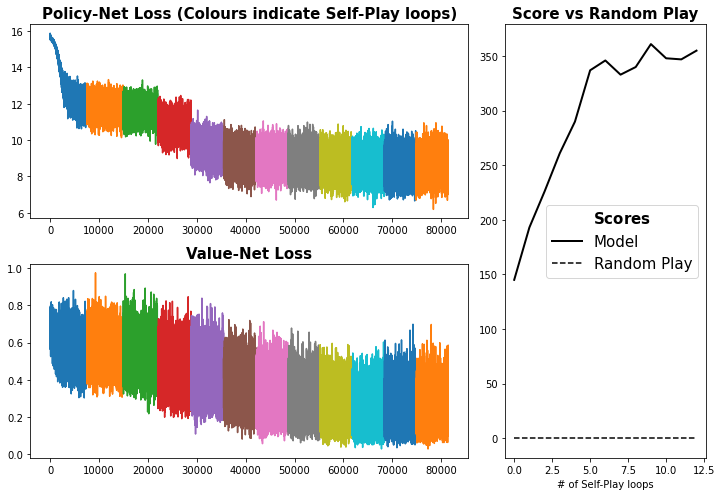

In [32]:
import matplotlib.gridspec as gridspec
fig = plt.figure(1, figsize=(10,7))
gridspec.GridSpec(3,3)

# pnet loss
plt.subplot2grid((2,3), (0,0), colspan=2, rowspan=1)
for i in range(iterations):
    
    p_loss_fn = parameter_path +  "pnet_loss_v{}.data".format(i)
    
    with open(p_loss_fn, "rb") as f:
        
        data = pickle.load(f)
        
        if i == 0:
            lengths = []
            lp = np.empty(0)

        plt.plot(np.arange(len(data))+np.sum(lengths), data, label="Round %s"%i)
        lp = np.append(lp, np.array(data).reshape(-1,1))
        lengths.append(len(data))
        
#plt.legend(title="Self-play rounds", ncol=4)
plt.title("Policy-Net Loss (Colours indicate Self-Play loops)", fontweight="bold", fontsize=15);


# vnet loss
plt.subplot2grid((2,3), (1,0), colspan=2, rowspan=1)
for i in range(iterations):
    
    v_loss_fn = parameter_path + "vnet_loss_v{}.data".format(i)
    
    with open(v_loss_fn, "rb") as f:
    
        data = pickle.load(f)
        
        if i == 0:
            lengths = []
            lv = np.empty(0)
            
        plt.plot(np.arange(len(data))+np.sum(lengths), data, label="Round %s"%i)
        lv = np.append(lv, np.array(data).reshape(-1,1))
        lengths.append(len(data))
plt.title("Value-Net Loss", fontweight="bold", fontsize=15);

# validation
plt.subplot2grid((2,3), (0,2), colspan=1, rowspan=2)
# plt.plot([x[0] for x in b_scores], color="r", linewidth=2)
# plt.plot([x[1] for x in b_scores], color="g", linewidth=2)
# plt.plot([x[2] for x in b_scores], color="k", linewidth=2)
plt.plot([-x[0]+x[1] for x in b_scores], color="k", linewidth=2, label="Model")
plt.plot(np.arange(iterations+1), np.zeros(iterations+1), color="k", linestyle="--", label="Random Play")
plt.legend(title=r"$\bf{Scores}$", fontsize=15)

plt.title("Score vs Random Play", fontweight="bold", fontsize=15)
plt.xlabel("# of Self-Play loops")
plt.tight_layout()
#plt.savefig("/images/Loss.png", dpi=80)

-----

### Let's do a small inspection of the value and policy-net on a couple of boards:

In [29]:
# In case you want to save loss and evaluation scores
# fn = "iter24_games500_depth25_temp1_lr0.01_bs64_epochs16_randomgames150.data"
# with open (fn, "wb") as f:
#     pickle.dump([lp, lv, b_scores, lengths], f)

# """Pretty""" plotting functions

def plot_ttt(state):
    board = []
    for i, j in enumerate(state):
        if j == 1:
            board.append("x")
        elif j == -1:
            board.append("o")
        else:
            board.append(" ")
    print("Board=")
    print(np.array(board).reshape(3,3))
    
def ttt_text(state):
    board = []
    for i, j in enumerate(state):
        if j == 1:
            board.append("x")
        elif j == -1:
            board.append("o")
        else:
            board.append(" ")
            
    xoff = [0.27, 1.27, 2.27, 0.27, 1.27, 2.27, 0.27, 1.27, 2.27]
    yoff = [0.7, 0.7, 0.7, 1.7, 1.7, 1.7, 2.7, 2.7, 2.7]
    for i,j in enumerate(board):
        plt.text(xoff[i], yoff[i], j, color="white", fontweight="bold", fontsize=60);
        
def ttt_annotate(state, ax):
    board = []
    for i, j in enumerate(state):
        if j == 1:
            board.append("x")
        elif j == -1:
            board.append("o")
        else:
            board.append(" ")
            
    xoff = [0.2, 1.2, 2.2, 0.2, 1.2, 2.2, 0.2, 1.2, 2.2]
    yoff = [0.7, 0.7, 0.7, 1.7, 1.7, 1.7, 2.7, 2.7, 2.7]
    xoff = [x-0.01 for x in xoff]
    yoff = [y+0.08 for y in yoff]

    for i,j in enumerate(board):
        ax.text(xoff[i], yoff[i], j, color="white", fontsize=50);

Loading version 11. Perspective = x
--------------------
Guaranteed loss:


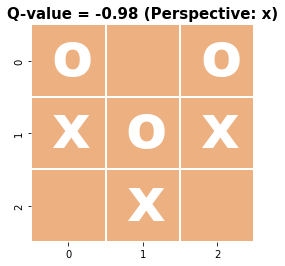

--------------------
Guaranteed win:


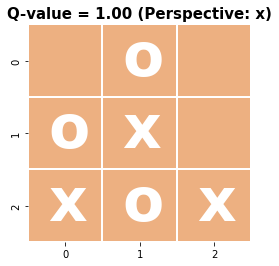

In [58]:
model = ValueNet()

#version = iterations-1
version = iterations - 1
if version > 0: # load parameters from previous versions
    model.load_state_dict(torch.load(parameter_path + "vnet_v{}".format(version)))
print("Loading version %d. Perspective = x" % (version))
print("-"*20)

state = [-1, 0, -1, 1, -1, 1, 0, 1, 0]
print("Guaranteed loss:")
fig = plt.figure(1, figsize=(4,4))
sns.heatmap(np.zeros((3,3)), linewidth=2,  cmap="flare", cbar=False)
ttt_text(state)
out = model.predict(torch.tensor(state).float())
fn = "Q-value = %.2f (Perspective: x)" % (out[0])
plt.title(fn, fontweight="bold", fontsize=15); plt.savefig("./images/badboard.png", dpi=80); plt.show()

print("-"*20)

state = [0, -1, 0, -1, 1, 0, 1, -1, 1]
print("Guaranteed win:")
fig = plt.figure(1, figsize=(4,4))
sns.heatmap(np.zeros((3,3)), linewidth=2,  cmap="flare", cbar=False)
ttt_text(state)
out = model.predict(torch.tensor(state).float())
fn = "Q-value = %.2f (Perspective: x)" % (out[0])
plt.title(fn, fontweight="bold", fontsize=15); plt.savefig("./images/goodboard.png", dpi=80)




### The lower board is much better and the Q-value reflects this. Would be worth it to do some further checking.

### Let's see the suggestions of the policy-net.

In [ ]:
model = PolicyNet()
version = iterations-1
if version > 0: # load parameters from previous versions
    model.load_state_dict(torch.load(parameter_path + "pnet_v{}".format(version)))

Loading version 0. Perspective = x
Loading version 1. Perspective = x
Loading version 2. Perspective = x
Loading version 3. Perspective = x
Loading version 4. Perspective = x
Loading version 5. Perspective = x


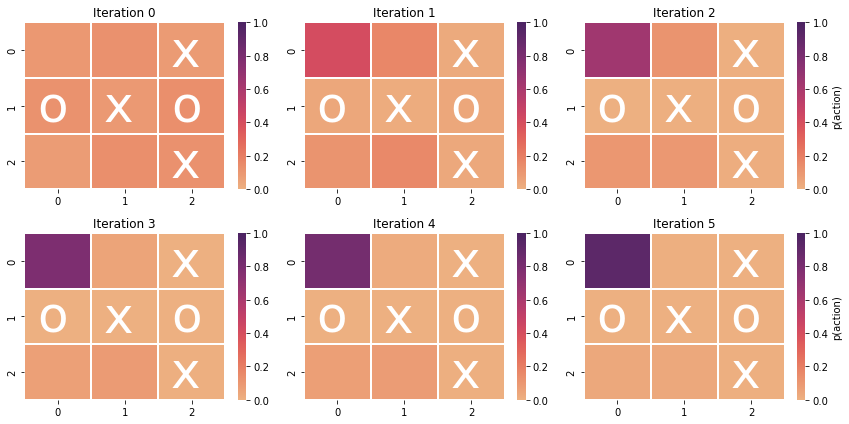

In [75]:
fig, ax = plt.subplots(2,3, figsize=(12,6))

version = 0
for i in range(2):
    for j in range(3):
        

        model = PolicyNet()
        if version > 0: # load parameters from previous versions
            model.load_state_dict(torch.load(parameter_path + "pnet_v{}".format(version)))
        print("Loading version %d. Perspective = x" % (version))

        state = [0, 0, 0, -1, 1, -1, 0, 0, 1]
        state = [0, 0, 1, -1, 1, -1, 0, 0, 1]
        out = model.predict(torch.tensor(state).float())
        if j==2:
            sns.heatmap(out.reshape(3,3), linewidth=2,  cmap="flare", vmin=0, vmax=1, cbar_kws={'label': 'p(action)'}, ax=ax[i,j])
            
        else:
            sns.heatmap(out.reshape(3,3), linewidth=2,  cmap="flare", vmin=0, vmax=1, ax=ax[i,j])
            
        ax[i,j].set_title("Iteration %d" % (version))
        ttt_annotate(state, ax[i,j]); 
        version += 1

plt.tight_layout()
plt.savefig("./images/p_1.png", dpi=80)
plt.show() 

Loading version 0. Perspective = x
Loading version 1. Perspective = x
Loading version 2. Perspective = x
Loading version 3. Perspective = x
Loading version 4. Perspective = x
Loading version 5. Perspective = x


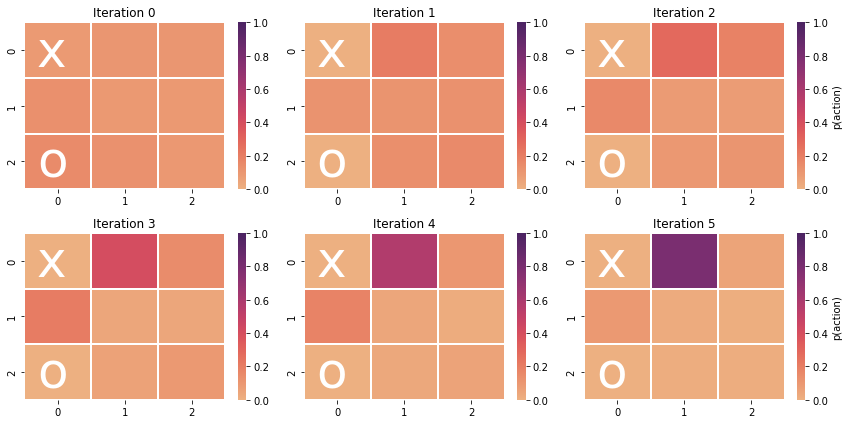

In [70]:
fig, ax = plt.subplots(2,3, figsize=(12,6))

version = 0
for i in range(2):
    for j in range(3):
        

        model = PolicyNet()
        if version > 0: # load parameters from previous versions
            model.load_state_dict(torch.load(parameter_path + "pnet_v{}".format(version)))
        print("Loading version %d. Perspective = x" % (version))

        state = [1, 0, 0, 0, 0, 0, -1, 0, 0]
        out = model.predict(torch.tensor(state).float())
        if j==2:
            sns.heatmap(out.reshape(3,3), linewidth=2,  cmap="flare", vmin=0, vmax=1, cbar_kws={'label': 'p(action)'}, ax=ax[i,j])
            
        else:
            sns.heatmap(out.reshape(3,3), linewidth=2,  cmap="flare", vmin=0, vmax=1, ax=ax[i,j])
            
        ax[i,j].set_title("Iteration %d" % (version))
        ttt_annotate(state, ax[i,j]); 
        version += 1

plt.tight_layout()
plt.savefig("./images/p_2.png", dpi=80)
plt.show()  

Number of visits= [2, 13, 2, 2, 1]
Board=
[[' ' ' ' ' ']
 ['o' 'x' 'o']
 [' ' 'x' ' ']]
MCTS pi = [0.1  0.65 0.1  0.1  0.05]
Next Move = 1


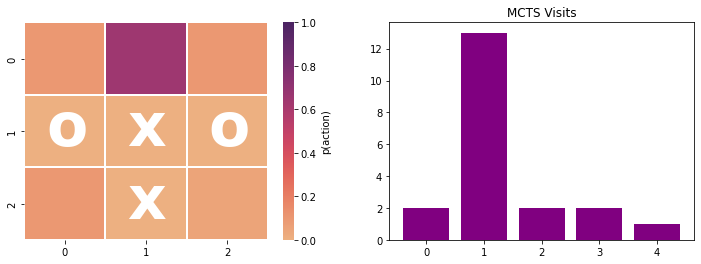

In [78]:
def ttt_text(state, ax):
    board = []
    for i, j in enumerate(state):
        if j == 1:
            board.append("x")
        elif j == -1:
            board.append("o")
        else:
            board.append(" ")
            
    xoff = [0.27, 1.27, 2.27, 0.27, 1.27, 2.27, 0.27, 1.27, 2.27]
    yoff = [0.7, 0.7, 0.7, 1.7, 1.7, 1.7, 2.7, 2.7, 2.7]
    for i,j in enumerate(board):
        ax.text(xoff[i], yoff[i], j, color="white", fontweight="bold", fontsize=60);

# Have a try with MCTS
fig, ax = plt.subplots(1,2,figsize=(12,4))

parameter_path = "./dnn_checkpoints2/"
state = [0, 0, 0, -1, 1, -1, 0, 1, 0]
mcts = MCTS(state , 1, 20, parameter_path)
root = mcts.search(version=0)
t = 1 # temperature

visits = [root.child[i].N**t for i in range(len(root.child))]

print("Number of visits=", visits)

# plot
ax[1].bar(np.arange(5), visits, color="purple"); plt.title("MCTS Visits")
plot_ttt(state)
print("MCTS pi =", visits/np.sum(visits))
print("Next Move =", np.random.choice(np.arange(len(visits)), p=visits/np.sum(visits), size=1)[0])

ph = np.zeros(9)
env = TTT()
legal_moves = env.legal_moves(state)
ph[legal_moves] = visits/np.sum(visits)
sns.heatmap(ph.reshape(3,3), linewidth=2,  cmap="flare", vmin=0, vmax=1, cbar_kws={'label': 'p(action)'}, ax=ax[0])
ttt_text(state, ax[0]); plt.savefig("./images/mcts.png", dpi=80); plt.show()